## Email-Spam-Ham detection using NLP


#### Using given dataset we predict whether an email is spam or ham. We have used Random Forest classifier algorithm for the same


In [56]:
#importing required libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot

import re #regular expressions
import nltk #python's own nlp library

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import string

from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

import time

### Reading dataset

In [57]:
dataset = pd.read_csv("C:\\Users\\kode surendra aba\\Desktop\\Data science\\python\\Sample projects\\emails_spam_ham_Nlp\\emails.csv")

### Explore data

In [58]:
list(dataset)
dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [59]:
dataset.shape

(5728, 2)

In [60]:
#drop duplicate data
dataset.drop_duplicates(inplace = True)
dataset.shape

(5695, 2)

In [61]:
print (pd.DataFrame(dataset.isnull().sum()))

      0
text  0
spam  0


In [62]:
#split text column into array of words
dataset['text'] = dataset['text'].map(lambda text:re.sub('\W+', ' ',text)).apply(lambda x: (x.lower()).split())

#The fist word is Subjet in every column, we will remove it and take array from index 1 instead
dataset['text']=dataset['text'].map(lambda text: text[1:])

#### Remove stopword

In [63]:
#Remove stopword
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

dataset['text'] = dataset['text'].apply(lambda x: remove_stopwords(x))

### Lemmatizing text

In [64]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

dataset.head()

,text,spam
0,"[naturally, irresistible, corporate, identity,...",1
1,"[stock, trading, gunslinger, fanny, merrill, m...",1
2,"[unbelievable, new, homes, made, easy, im, wan...",1
3,"[4, color, printing, special, request, additio...",1
4,"[money, get, software, cds, software, compatib...",1


### Count vectorizer

In [65]:
count_vect = CountVectorizer(analyzer=lemmatizing)
X_counts = count_vect.fit_transform(dataset['text'])
print(X_counts.shape)
print(count_vect.get_feature_names())

X_counts_df = pd.DataFrame(X_counts.toarray())

X_counts_df.columns = count_vect.get_feature_names()

X_counts_df.head()

(5695, 34586)
['0', '00', '000', '0000', '000000', '00000000', '0000000000', '000000000003619', '000000000003991', '000000000003997', '000000000005168', '000000000005409', '000000000005411', '000000000005412', '000000000005413', '000000000005820', '000000000006238', '000000000006452', '000000000007494', '000000000007498', '000000000007876', '000000000010552', '000000000011185', '000000000012677', '000000000012734', '000000000012735', '000000000012736', '000000000012738', '000000000012741', '000000000012987', '000000000013085', '000000000013287', '000000000015384', '000000000015793', '000000000023619', '000000000024099', '000000000025307', '000000000025312', '000010220', '0000102317', '0000102374', '0000102789', '0000104281', '0000104282', '0000104486', '0000104631', '0000104730', '0000104776', '0000104778', '0000107043', '0000108729', '000066', '0001', '000166', '0002', '000202', '0003', '0004', '0005', '0006', '00076', '0009249480', '0009249481', '0009249504', '0009249505', '000924950

,0,00,000,0000,000000,00000000,0000000000,000000000003619,000000000003991,000000000003997,...,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Tfidf vectorizer 

In [66]:
tfidf_vect = TfidfVectorizer(analyzer=lemmatizing)
X_tfidf = tfidf_vect.fit_transform(dataset['text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

X_tfidf_df = pd.DataFrame(X_tfidf.toarray())

X_tfidf_df.columns = tfidf_vect.get_feature_names()

X_tfidf_df.head()

(5695, 34586)
['0', '00', '000', '0000', '000000', '00000000', '0000000000', '000000000003619', '000000000003991', '000000000003997', '000000000005168', '000000000005409', '000000000005411', '000000000005412', '000000000005413', '000000000005820', '000000000006238', '000000000006452', '000000000007494', '000000000007498', '000000000007876', '000000000010552', '000000000011185', '000000000012677', '000000000012734', '000000000012735', '000000000012736', '000000000012738', '000000000012741', '000000000012987', '000000000013085', '000000000013287', '000000000015384', '000000000015793', '000000000023619', '000000000024099', '000000000025307', '000000000025312', '000010220', '0000102317', '0000102374', '0000102789', '0000104281', '0000104282', '0000104486', '0000104631', '0000104730', '0000104776', '0000104778', '0000107043', '0000108729', '000066', '0001', '000166', '0002', '000202', '0003', '0004', '0005', '0006', '00076', '0009249480', '0009249481', '0009249504', '0009249505', '000924950

,0,00,000,0000,000000,00000000,0000000000,000000000003619,000000000003991,000000000003997,...,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Create new features

#### We created 2 new features 
1. body_len -> length of the email message
2. punct%   -> % of punctuations in the email message

In [67]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

dataset['body_len'] = dataset['text'].apply(lambda x: len(x) - x.count(" "))
dataset['punct%'] = dataset['text'].apply(lambda x: count_punct(x))
dataset.head()

,text,spam,body_len,punct%
0,"[naturally, irresistible, corporate, identity,...",1,217,47.9
1,"[stock, trading, gunslinger, fanny, merrill, m...",1,63,0.0
2,"[unbelievable, new, homes, made, easy, im, wan...",1,44,0.0
3,"[4, color, printing, special, request, additio...",1,54,0.0
4,"[money, get, software, cds, software, compatib...",1,18,0.0


#### Plotting features one by one to see its importance in prediction

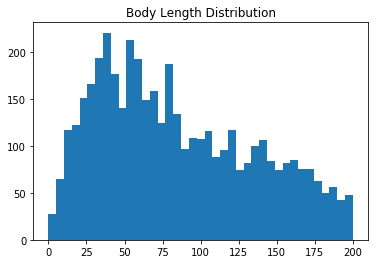

In [13]:
#plot for body length
bins = np.linspace(0, 200, 40)

pyplot.hist(dataset['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


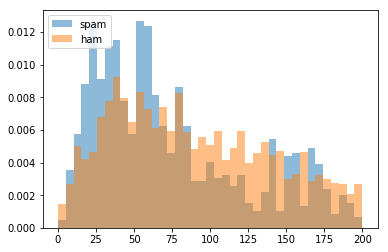

In [14]:
#Check if body_len is able to differentiate in spam and ham
bins = np.linspace(0, 200, 40)
pyplot.hist(dataset[dataset['spam']==1]['body_len'], bins, alpha=0.5, normed=True, label='spam')
pyplot.hist(dataset[dataset['spam']==0]['body_len'], bins, alpha=0.5, normed=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

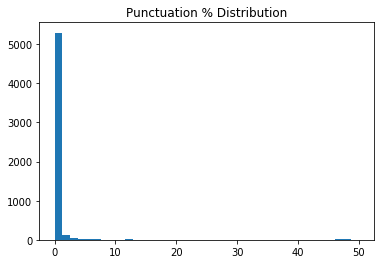

In [15]:
#plot for punctuation count
bins = np.linspace(0, 50, 40)

pyplot.hist(dataset['punct%'], bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

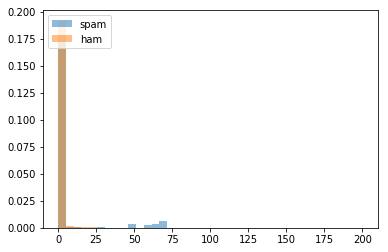

In [16]:
#Check if punct% is able to differentiate in spam and ham
bins = np.linspace(0, 200, 40)

pyplot.hist(dataset[dataset['spam']==1]['punct%'], bins, alpha=0.5, normed=True, label='spam')
pyplot.hist(dataset[dataset['spam']==0]['punct%'], bins, alpha=0.5, normed=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

### Checking which vectorizer is better Count-Vectorizer or Tfidf Vectorizer

#### Checking Accuracy/Precision/Recall using CountVectorizer

In [68]:
#Taking independent variables separately
X_features = pd.concat([dataset['punct%'].reset_index(drop=True),dataset['body_len'].reset_index(drop=True),X_counts_df.reset_index(drop=True)], axis=1)

X_features.shape

#Divide data in train and test
X_train, X_test, y_train, y_test = train_test_split(X_features, dataset['spam'], test_size=0.2)

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label=0, average='binary')

print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 0.89 / Recall: 1.0 / Accuracy: 0.907


#### Checking Accuracy/Precision/Recall using Tfidf Vectorizer

In [69]:
X_features = pd.concat([dataset['punct%'].reset_index(drop=True),dataset['body_len'].reset_index(drop=True),X_tfidf_df.reset_index(drop=True)], axis=1)

X_features.shape


#Divide data in train and test
X_train, X_test, y_train, y_test = train_test_split(X_features, dataset['spam'], test_size=0.2)

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label=0, average='binary')

print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 0.902 / Recall: 0.999 / Accuracy: 0.915


#### Here we can definetely see that using Tfidf vectorization we get a better result so we choose tfidf vectorizer ahead

### Random Forest classifier algorithm

In [70]:
#Divide data in train and test
X_train, X_test, y_train, y_test = train_test_split(X_features, dataset['spam'], test_size=0.2)

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label=0, average='binary')

print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 0.906 / Recall: 0.999 / Accuracy: 0.919


#### Checking best hyperparameter value to choose for better results

In [71]:
#Checing best hyperparameter value to choose for better results
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label=1, average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [72]:
#executing above function
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 0.976 / Recall: 0.316 / Accuracy: 0.845
Est: 10 / Depth: 20 ---- Precision: 0.975 / Recall: 0.617 / Accuracy: 0.91
Est: 10 / Depth: 30 ---- Precision: 0.985 / Recall: 0.777 / Accuracy: 0.947
Est: 10 / Depth: None ---- Precision: 0.981 / Recall: 0.82 / Accuracy: 0.956
Est: 50 / Depth: 10 ---- Precision: 1.0 / Recall: 0.277 / Accuracy: 0.838
Est: 50 / Depth: 20 ---- Precision: 1.0 / Recall: 0.637 / Accuracy: 0.918
Est: 50 / Depth: 30 ---- Precision: 1.0 / Recall: 0.742 / Accuracy: 0.942
Est: 50 / Depth: None ---- Precision: 0.983 / Recall: 0.922 / Accuracy: 0.979
Est: 100 / Depth: 10 ---- Precision: 1.0 / Recall: 0.328 / Accuracy: 0.849
Est: 100 / Depth: 20 ---- Precision: 1.0 / Recall: 0.668 / Accuracy: 0.925
Est: 100 / Depth: 30 ---- Precision: 1.0 / Recall: 0.816 / Accuracy: 0.959
Est: 100 / Depth: None ---- Precision: 0.992 / Recall: 0.914 / Accuracy: 0.979


#### Best values of parameters are 
Est: 50 / Depth: None ---- Precision: 0.987 / Recall: 0.897 / Accuracy: 0.974

### Final evaluation

In [81]:
X_train, X_test, y_train, y_test = train_test_split(dataset[['text', 'body_len', 'punct%']], dataset['spam'], test_size=0.2)

In [82]:
tfidf_vect = TfidfVectorizer(analyzer=lemmatizing)
tfidf_vect_fit = tfidf_vect.fit(X_train['text'])

tfidf_train = tfidf_vect_fit.transform(X_train['text'])
tfidf_test = tfidf_vect_fit.transform(X_test['text'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,31054,31055,31056,31057,31058,31059,31060,31061,31062,31063
0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,168,29.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Choosing best parameters

In [85]:
rf = RandomForestClassifier(n_estimators=50, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 2.679 / Predict time: 0.379 ---- Precision: 0.992 / Recall: 0.942 / Accuracy: 0.985
